For theoretical background please refer to theoretical discussion reading material on LMS .

The case study we take up in this module pertains to red wines. Dataset that we have contains chemical properties over 4000 red wines . In class we'll take up two important chemical properties which control wine's aroma and potency , namely sulphate and alcohol content.

We want to check how many groups exist within wines based on these chemicals. Lets begin.

In [59]:
import warnings
warnings.filterwarnings('ignore')

myfile='C:/Users/Mohit/Desktop/edvancer/Data/Data/winequality-red.csv'

import pandas as pd
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

%matplotlib inline

wine=pd.read_csv(myfile,sep=";")

### Data Preparation

In [60]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [61]:
wine=wine[["sulphates","alcohol"]]

In [62]:
wine.head()

,sulphates,alcohol
0,0.56,9.4
1,0.68,9.8
2,0.65,9.8
3,0.58,9.8
4,0.56,9.4


You can see that scale of sulphates and alcohol are very different. If we let them be like that , distances will be dominated by alcohol percentages alone due to their scale. We need to scale them

In [63]:
from sklearn.preprocessing import StandardScaler

In [64]:
s1 = StandardScaler()

In [65]:
s1.fit(wine)
wine1 = s1.transform(wine)

In [66]:
wine1

array([[-0.57920652, -0.96024611],
       [ 0.1289504 , -0.58477711],
       [-0.04808883, -0.58477711],
       ...,
       [ 0.54204194,  0.54162988],
       [ 0.30598963, -0.20930812],
       [ 0.01092425,  0.54162988]])

In [ ]:
# wine1 = s1.fit_tranform(wine)

In [67]:
wine_std=pd.DataFrame(wine1,columns=list(wine.columns))

In [68]:
wine_std.describe()

,sulphates,alcohol
count,1.599000e+03,1.599000e+03
mean,7.639596e-16,9.437243e-16
std,1.000313e+00,1.000313e+00
min,-1.936507e+00,-1.898919e+00
25%,-6.382196e-01,-8.663789e-01
50%,-2.251281e-01,-2.093081e-01
75%,4.240158e-01,6.354971e-01
max,7.918677e+00,4.202453e+00


In [69]:
# 0.1+0.1+0.1 == 0.3

False

In [ ]:
# 0.100000000000000000000000000123
# Floatin point approximation

Output of function `scale` is matrix , we need to convert it back to data frame in order to keep on using it as data frame.

In [70]:
wine_std.head()

,sulphates,alcohol
0,-0.579207,-0.960246
1,0.128950,-0.584777
2,-0.048089,-0.584777
3,-0.461180,-0.584777
4,-0.579207,-0.960246


In [71]:
from sklearn.cluster import AgglomerativeClustering

In [72]:
X=wine_std
for n_clusters in range(2,10):
    cluster_model = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean',linkage='ward')
    cluster_labels = cluster_model.fit_predict(X)
    silhouette_avg = silhouette_score(X,cluster_labels,metric='euclidean')
    print("For n_clusters =", n_clusters, 
          "The average silhouette_score is:", silhouette_avg)


For n_clusters = 2 The average silhouette_score is: 0.39774871062556993
For n_clusters = 3 The average silhouette_score is: 0.4325565789774022
For n_clusters = 4 The average silhouette_score is: 0.3829590268275032
For n_clusters = 5 The average silhouette_score is: 0.3473333316189179
For n_clusters = 6 The average silhouette_score is: 0.3338880616049043
For n_clusters = 7 The average silhouette_score is: 0.3361186503258208
For n_clusters = 8 The average silhouette_score is: 0.34320573915940195
For n_clusters = 9 The average silhouette_score is: 0.29509872334072074


We have agreement on number of clusters. Lets see how the end results differ

In [74]:
s = 3
hclust = AgglomerativeClustering(n_clusters=s, affinity='euclidean',linkage='ward')
hclust.fit(wine_std)

AgglomerativeClustering(n_clusters=3)

In [75]:
labels = hclust.fit_predict(X)
wine_std["cluster"]=labels

In [79]:
sum(labels==0)

673

In [80]:
import seaborn as sns

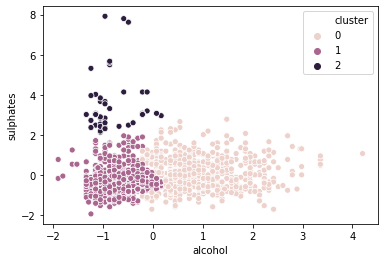

In [81]:
sns.scatterplot(x='alcohol',y='sulphates',data=wine_std,hue='cluster')

In [83]:
wine_raw=pd.read_csv(myfile,sep=";")

In [84]:
wine_raw['label'] = labels

In [86]:
wine_raw.groupby('label')['quality'].mean()

label
0    6.032689
1    5.348123
2    5.340426
Name: quality, dtype: float64

In [87]:
wine_raw.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

### K Means

In [88]:
range_n_clusters = [2, 3, 4, 5, 6,7,8,9]

In the code below , we are trying different values of cluster numbers and for each we are examning silhoutte scores along with their silhoutte plots and visual representation of clusters.

Most of the code below has to do with how the plots are made pretty.

You dont need to do all that every time you do segmentation using K-means. This is more to do with giving you first hand experience as to what silhoutte plots are and how the eventual clusters look like.

You should also notice , how silhoutte scores both average and individual detriorate as we keep on unneccesarily increasing number of clusters. 

In [89]:
X=wine_std[["alcohol","sulphates"]]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.422159423451465
For n_clusters = 3 The average silhouette_score is : 0.46544717143983805
For n_clusters = 4 The average silhouette_score is : 0.4271058029196418
For n_clusters = 5 The average silhouette_score is : 0.39945259826051344
For n_clusters = 6 The average silhouette_score is : 0.39241335420623513
For n_clusters = 7 The average silhouette_score is : 0.38146676704145843
For n_clusters = 8 The average silhouette_score is : 0.38045212417341046
For n_clusters = 9 The average silhouette_score is : 0.35185546202763585


From silhoutte's score above we decided value of n_clusters as 3

In [90]:
k = 3
kmeans = KMeans(n_clusters=k)
kmeans.fit(wine_std)

KMeans(n_clusters=3)

In [91]:
labels = kmeans.labels_
wine_std["cluster"]=labels

In [92]:
import seaborn as sns

In [93]:
wine_std.head()

,sulphates,alcohol,cluster
0,-0.579207,-0.960246,1
1,0.128950,-0.584777,1
2,-0.048089,-0.584777,1
3,-0.461180,-0.584777,1
4,-0.579207,-0.960246,1


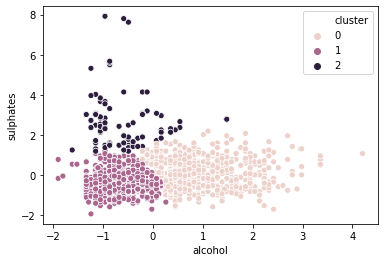

In [94]:
sns.scatterplot(x='alcohol',y='sulphates',data=wine_std,hue='cluster')

We can decide number of cluster using SSW as well as mentioned in the theoretical discussion. SSW is named `inertia_` as kmeans function's attribute.

In [23]:
kmeans.inertia_

1412.8789168620108

Lets look at inertia/SSW values for many Ks , see if our conclusions match with results obtained from silhoutte score.

In [95]:
Ks=np.linspace(2,15,14)

In [96]:
Ks

array([ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
       15.])

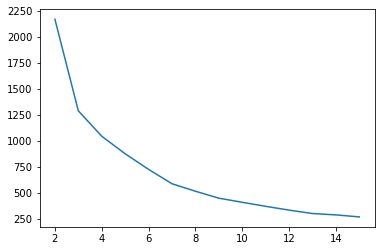

In [97]:
ssw=[]
for k in Ks:
    kmeans=KMeans(n_clusters=int(k))
    kmeans.fit(wine_std)
    ssw.append(kmeans.inertia_)
plt.plot(Ks,ssw)

You can see here the clear elbow point at k=3.

We can try hierarchical clustering as well, it gives most efficient clusters but at much more computational cost. Lets see if results from it are very different from K-means.

### Image Compression using K Means

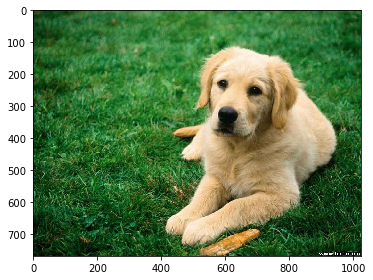

In [98]:
from skimage import io
from sklearn.cluster import KMeans
import numpy as np

#Read the image
image = io.imread('Clustering-13.jpg')
io.imshow(image)
io.show()

In [100]:
image.shape

(768, 1024, 3)

In [47]:
image

array([[[ 38,  71,  24],
        [ 36,  69,  22],
        [ 32,  65,  18],
        ...,
        [ 43, 113,  41],
        [ 41, 111,  39],
        [ 40, 110,  37]],

       [[ 41,  74,  27],
        [ 38,  71,  24],
        [ 34,  67,  20],
        ...,
        [ 42, 112,  40],
        [ 39, 109,  37],
        [ 38, 108,  35]],

       [[ 45,  78,  31],
        [ 42,  75,  28],
        [ 38,  71,  24],
        ...,
        [ 39, 109,  37],
        [ 37, 107,  35],
        [ 36, 106,  33]],

       ...,

       [[ 24,  28,  13],
        [ 22,  26,  11],
        [ 17,  24,   8],
        ...,
        [ 25,  56,  25],
        [  0,  33,   0],
        [ 19,  54,  21]],

       [[ 23,  25,  11],
        [ 21,  25,  10],
        [ 19,  23,   8],
        ...,
        [ 18,  49,  15],
        [  0,  32,   0],
        [  0,  32,   0]],

       [[ 17,  19,   5],
        [ 17,  19,   5],
        [ 16,  20,   5],
        ...,
        [ 24,  56,  19],
        [ 32,  66,  29],
        [ 39,  75,  37]]

In [101]:
#Dimension of the original image
rows = image.shape[0]
cols = image.shape[1]

In [102]:
rows

768

In [103]:
cols

1024

In [104]:
#Flatten the image
image = image.reshape(rows*cols, 3)

In [105]:
#Implement k-means clustering to form k clusters
kmeans = KMeans(n_clusters=5,n_jobs=-1)
kmeans.fit(image)

KMeans(n_clusters=5, n_jobs=-1)

In [106]:
kmeans.cluster_centers_

array([[ 14.44118885,  57.71765764,  15.0159938 ],
       [233.40976955, 207.0880784 , 168.64029109],
       [ 77.42396917, 135.83283011,  69.70841761],
       [ 42.19528783, 105.43618135,  42.02771938],
       [170.702246  , 148.21925014, 101.47337972]])

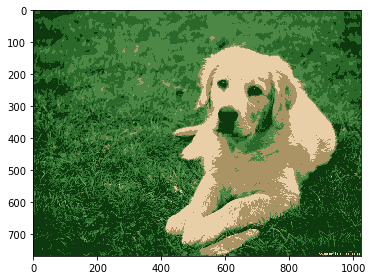

In [107]:
#Replace each pixel value with its nearby centroid
compressed_image = kmeans.cluster_centers_[kmeans.labels_]
compressed_image = np.clip(compressed_image.astype('uint8'), 0, 255)

#Reshape the image to original dimension
compressed_image = compressed_image.reshape(rows, cols, 3)

#Save and display output image
io.imsave('compressed_image_64.png', compressed_image)
io.imshow(compressed_image)
io.show()

We can see that kmeans did an excellent job and we did not really need to get into hierarchical clustering to get the best results.

Next we look density based clustering algorithm dbscan. We will take a toy data to bring out clear difference between k-means and dbscan. This example demonstrate how k-means can no capture non-spherical groups in the data. We will be using make_moons function to make data which has two moon shaped very apparent groups. Lets see.

In [109]:
from sklearn.datasets import make_moons

mydata = make_moons(n_samples = 2000,noise=0.05)
print(mydata[0].shape)
mydata=pd.DataFrame(mydata[0],columns=["X","Y"])
mydata.head()

(2000, 2)


,X,Y
0,0.071230,-0.016552
1,-0.367536,0.913054
2,0.913121,0.434302
3,1.264675,-0.483767
4,1.960744,0.374882


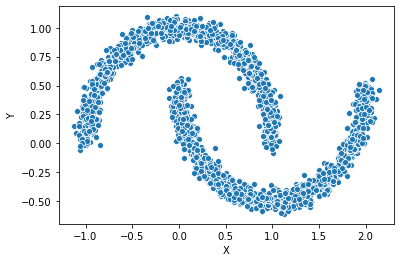

In [110]:
sns.scatterplot(x='X',y='Y',data=mydata)

We can ask k-means to make as many clusters and it will oblige as opposed to dbscan which finds on its own how many natural clusters are there in the data

In [111]:
kmeans=KMeans(n_clusters=2)
kmeans.fit(mydata)
mydata["cluster"]=kmeans.labels_

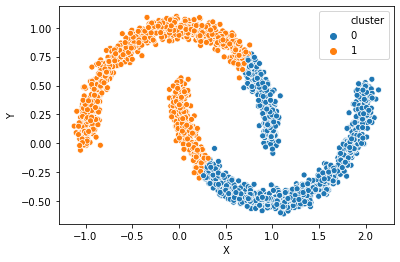

In [112]:
sns.scatterplot(x='X',y='Y',data=mydata,hue='cluster')

As you can see , these are not the clusters that you expected . Lets ask k-mean to make 5 clusters and see what it does

In [113]:
kmeans=KMeans(n_clusters=5)
kmeans.fit(mydata)
mydata["cluster"]=kmeans.labels_

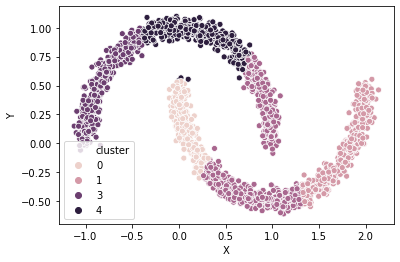

In [114]:
sns.scatterplot(x='X',y='Y',data=mydata,hue='cluster')

You can force k-means to make as many groups in the data as you want, it wont bother about how many natural groups there are in the data. lets see how dbscan treats this.

### DBSCAN Algorithm

In [115]:
from sklearn.cluster import DBSCAN
from sklearn import metrics


In [116]:
del mydata['cluster']

In [117]:
db = DBSCAN(eps=0.2, min_samples=10, metric='euclidean').fit(mydata)
mydata['cluster']=db.labels_

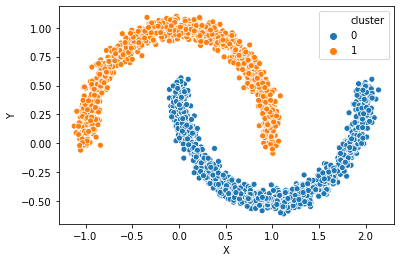

In [118]:
sns.scatterplot(x='X',y='Y',data=mydata,hue='cluster')

Lets try increasing eps and see what effects it has . 

In [119]:
del mydata['cluster']
db = DBSCAN(eps=0.3, min_samples=10, metric='euclidean').fit(mydata)
mydata['cluster']=db.labels_

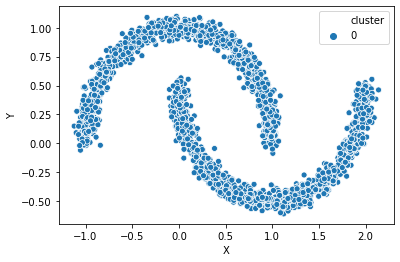

In [120]:
sns.scatterplot(x='X',y='Y',data=mydata,hue='cluster')

As you can see increasing neighborhood size results in all points becoming part of same cluster, which is the intended effect.

### DBSCAN for outlier detection

Now lets see an example where , dbscan doesnt blindly club all the points into clusters, but leave points which are not supposed to be in any clusters. This also demonstrate how k-means is different from dbscan.

In [121]:
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler


X = StandardScaler().fit_transform(X)

db = DBSCAN(eps=0.3, min_samples=10).fit(X)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

Estimated number of clusters: 2
Silhouette Coefficient: 0.429


In [122]:
df=pd.DataFrame(X,columns=['x1','x2'])
df['labels']=labels

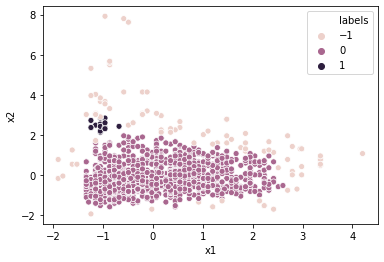

In [123]:
sns.scatterplot(x='x1',y='x2',data=df,hue='labels')

You can see how dbscan has found outliers. You can play around with the values of eps and min_samples to see how that changes outlier detection and number of clusters detected by dbscan.
